<a href="https://colab.research.google.com/github/BenUCL/Reef-acoustics-and-AI/blob/main/Code/UMAP_Indo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UMAP plot full datasets**
This script contains code blocks which import the csv files of features and create UMAP embeddings and plots with these. Blocks for each method and task is are indicated in bold headers.



In [ ]:
# Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip uninstall umap
!pip install umap-learn
!pip install umap-learn[plot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.4 MB/s 
     |████████████████████████████████| 1.1 MB 41.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=5bac7cf22a785e8851a1dd66e15d0e87d10138b656fb1fc759ae3fde9ae59a6e
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=c8825e9bb59de24ea6db08a2cb9d9c5f9125c2564da4070779120c57612441f0
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.2 MB 1.2 MB/s 
     |████████████████████████████████| 76 kB 4.5 MB/s 


In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap.umap_ as umap
import umap.plot
#from umap import plot
%matplotlib inline

import random

random.seed(123)

# Ecoacoustic Indices

In [ ]:
# Uppload the csv of features and copy the path
indices_path = r'/content/drive/MyDrive/Reef soundscapes with AI/Results/full_dataset_features/compound_index_indo.csv'

In [ ]:
data = pd.read_csv (indices_path) #load dataframe
indices_df = data.reset_index() #put index in order
indices_df = indices_df.iloc[: , 2:] #remove unnecessary index


indices_df

,minute,fish_ACI,fish_ACI_std,fish_ADI,fish_ADI_std,fish_H,fish_H_std,fish_Hf,fish_Hf_std,fish_M,...,full_H,full_H_std,full_Hf,full_Hf_std,full_M,full_M_std,full_BI,full_BI_std,NDSI,NDSI_std
0,BoF2.0930D.1678278701.180828.NT0930.wav,180.667980,22.555182,2.156149,0.081462,0.999806,0.000139,0.467640,0.038913,0.000159,...,0.999958,0.000026,0.742105,0.022057,0.000786,0.000096,3.756085,0.957902,0.628277,0.177200
1,SaF4.0902D.671907872.180830.NT0924.wav,202.084403,21.433853,2.195789,0.292442,0.999908,0.000045,0.483962,0.025508,0.000278,...,0.999942,0.000031,0.744351,0.011731,0.001902,0.000176,5.525697,0.881614,0.481185,0.106375
2,SaF3.1355D.805322778.180829.NT1356.wav,181.766749,25.356359,2.199550,0.048918,0.999864,0.000118,0.476466,0.026665,0.000189,...,0.999902,0.000058,0.741129,0.028133,0.001304,0.000093,4.907524,1.054116,0.441334,0.181443
3,SaN11.0940D.1678278701.180906.NT0954.wav,212.115207,15.154346,2.198496,0.289967,0.999900,0.000052,0.485119,0.020143,0.000309,...,0.999928,0.000028,0.739152,0.019008,0.001867,0.000165,4.531680,1.029127,0.350785,0.115750
4,BoF2.0930D.1678278701.180828.NT0950.wav,162.062029,15.067175,1.838506,0.212173,0.999364,0.000434,0.383880,0.047324,0.000382,...,0.999957,0.000024,0.738157,0.021520,0.000937,0.000076,3.721564,0.882146,0.570787,0.168368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3331,BoF3.1205H.1678278701.180829.NT1231.wav,179.962468,22.264434,2.144230,0.285608,0.999772,0.000190,0.471485,0.038290,0.000183,...,0.999956,0.000022,0.735731,0.025031,0.000882,0.000079,4.667324,1.402973,0.637327,0.128961
3332,BoF5.0940D.1677983769.180831.NT1007.wav,173.798179,18.817032,2.167538,0.078230,0.999808,0.000138,0.477006,0.043192,0.000152,...,0.999957,0.000024,0.739233,0.020290,0.000869,0.000075,4.770312,1.383683,0.703521,0.122336
3333,BoF3.1205H.1678278701.180829.NT1205.wav,170.721326,18.912549,2.195331,0.049818,0.999738,0.000199,0.481841,0.028076,0.000181,...,0.999955,0.000028,0.740048,0.019656,0.000890,0.000088,4.549716,1.364230,0.661858,0.099228
3334,BoF5.0940H.671907872.180831.NT1035.wav,182.770283,17.800611,2.232026,0.036044,0.999799,0.000152,0.486701,0.034486,0.000161,...,0.999958,0.000025,0.733094,0.017584,0.001027,0.000103,5.335363,1.142574,0.682951,0.120967


In [ ]:
# Add a column that denotes class
def get_class(filename):
    #find part of the name that corresponds to the deployment
     #adapted the get_identifier function above to only get class (e.g healthy)
    t = filename.split(".")[1][4:5]
    return t

class_type = []
for i in indices_df['minute']:
  if get_class(i) == 'D':
    class_type.append('Degraded')
  if get_class(i) == 'H':
    class_type.append('Healthy')

indices_df.insert(1, 'Habitat', class_type)

# Check the class column was added 
indices_df.head()

,minute,Habitat,fish_ACI,fish_ACI_std,fish_ADI,fish_ADI_std,fish_H,fish_H_std,fish_Hf,fish_Hf_std,...,full_H,full_H_std,full_Hf,full_Hf_std,full_M,full_M_std,full_BI,full_BI_std,NDSI,NDSI_std
0,BoF2.0930D.1678278701.180828.NT0930.wav,Degraded,180.667980,22.555182,2.156149,0.081462,0.999806,0.000139,0.467640,0.038913,...,0.999958,0.000026,0.742105,0.022057,0.000786,0.000096,3.756085,0.957902,0.628277,0.177200
1,SaF4.0902D.671907872.180830.NT0924.wav,Degraded,202.084403,21.433853,2.195789,0.292442,0.999908,0.000045,0.483962,0.025508,...,0.999942,0.000031,0.744351,0.011731,0.001902,0.000176,5.525697,0.881614,0.481185,0.106375
2,SaF3.1355D.805322778.180829.NT1356.wav,Degraded,181.766749,25.356359,2.199550,0.048918,0.999864,0.000118,0.476466,0.026665,...,0.999902,0.000058,0.741129,0.028133,0.001304,0.000093,4.907524,1.054116,0.441334,0.181443
3,SaN11.0940D.1678278701.180906.NT0954.wav,Degraded,212.115207,15.154346,2.198496,0.289967,0.999900,0.000052,0.485119,0.020143,...,0.999928,0.000028,0.739152,0.019008,0.001867,0.000165,4.531680,1.029127,0.350785,0.115750
4,BoF2.0930D.1678278701.180828.NT0950.wav,Degraded,162.062029,15.067175,1.838506,0.212173,0.999364,0.000434,0.383880,0.047324,...,0.999957,0.000024,0.738157,0.021520,0.000937,0.000076,3.721564,0.882146,0.570787,0.168368


In [ ]:
#####create standard plot in viewer 
mapper = umap.UMAP(n_neighbors=50, min_dist=0.5).fit(indices_df.iloc[:,2:40])

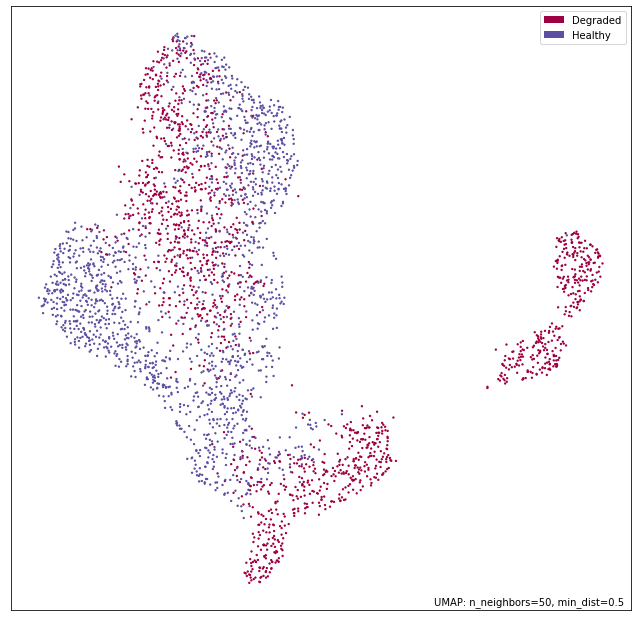

In [ ]:
#uses the 'habitat' column as the label
umap.plot.points(mapper, labels=indices_df.Habitat)#, theme = 'fire')

# Pretrained Network 

In [ ]:
# Uppload the csv of features and copy the path
pretrained_path = r'/content/drive/MyDrive/Reef soundscapes with AI/Results/full_dataset_features/pretrained_CNN_indo.csv'

data = pd.read_csv (pretrained_path) #load dataframe
temp_df = data.reset_index() #put index in order
temp_df = temp_df.iloc[: , 2:] #remove unnecessary index
temp_df = temp_df.T #transpose to match indices format
temp_df = temp_df.reset_index() #re-add the index
pretrained_df = temp_df.rename(columns={"index": "minute"})


pretrained_df

,minute,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,BoF2.0930D.1678278701.180828.NT0930.wav,0.002933,0.177240,0.388430,0.129290,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.041895,0.000000,0.000000,0.000000,0.433386,0.320776,0.000000,0.000000,0.0
1,SaF4.0902D.671907872.180830.NT0924.wav,0.000917,0.073721,0.515714,0.111717,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.166053,0.000093,0.000208,0.048393,0.167975,0.032886,0.000000,0.000000,0.0
2,SaF3.1355D.805322778.180829.NT1356.wav,0.023495,0.104395,0.360114,0.143027,0.000000,0.0,0.0,0.000855,0.0,...,0.0,0.104303,0.036998,0.001894,0.006081,0.209761,0.121807,0.000000,0.000000,0.0
3,SaN11.0940D.1678278701.180906.NT0954.wav,0.000865,0.126758,0.437884,0.209243,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.117832,0.001151,0.011284,0.000152,0.328505,0.123348,0.000000,0.007058,0.0
4,BoF2.0930D.1678278701.180828.NT0950.wav,0.019745,0.176513,0.399040,0.040165,0.000027,0.0,0.0,0.006952,0.0,...,0.0,0.020741,0.020154,0.003591,0.003634,0.350962,0.285468,0.002281,0.000323,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3331,BoF3.1205H.1678278701.180829.NT1231.wav,0.010470,0.125127,0.444852,0.083505,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.023687,0.000918,0.000000,0.000753,0.493698,0.257412,0.000423,0.000000,0.0
3332,BoF5.0940D.1677983769.180831.NT1007.wav,0.006456,0.129605,0.418061,0.163294,0.000000,0.0,0.0,0.001106,0.0,...,0.0,0.085375,0.000477,0.000000,0.000180,0.326792,0.223547,0.000000,0.000000,0.0
3333,BoF3.1205H.1678278701.180829.NT1205.wav,0.001636,0.122509,0.458245,0.078943,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.022889,0.000000,0.000000,0.000000,0.514317,0.261960,0.000536,0.000000,0.0
3334,BoF5.0940H.671907872.180831.NT1035.wav,0.008864,0.049046,0.569985,0.045106,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.140025,0.000000,0.000000,0.095348,0.208568,0.032443,0.000000,0.000000,0.0


In [ ]:
# Add a column that denotes class
def get_class(filename):
    #find part of the name that corresponds to the deployment
     #adapted the get_identifier function above to only get class (e.g healthy)
    t = filename.split(".")[1][4:5]
    return t

class_type = []
for i in pretrained_df['minute']:
  if get_class(i) == 'D':
    class_type.append('Degraded')
  if get_class(i) == 'H':
    class_type.append('Healthy')

pretrained_df.insert(1, 'Habitat', class_type)

# Check the class column was added 
pretrained_df.head()

,minute,Habitat,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,BoF2.0930D.1678278701.180828.NT0930.wav,Degraded,0.002933,0.177240,0.388430,0.129290,0.000000,0.0,0.0,0.000000,...,0.0,0.041895,0.000000,0.000000,0.000000,0.433386,0.320776,0.000000,0.000000,0.0
1,SaF4.0902D.671907872.180830.NT0924.wav,Degraded,0.000917,0.073721,0.515714,0.111717,0.000000,0.0,0.0,0.000000,...,0.0,0.166053,0.000093,0.000208,0.048393,0.167975,0.032886,0.000000,0.000000,0.0
2,SaF3.1355D.805322778.180829.NT1356.wav,Degraded,0.023495,0.104395,0.360114,0.143027,0.000000,0.0,0.0,0.000855,...,0.0,0.104303,0.036998,0.001894,0.006081,0.209761,0.121807,0.000000,0.000000,0.0
3,SaN11.0940D.1678278701.180906.NT0954.wav,Degraded,0.000865,0.126758,0.437884,0.209243,0.000000,0.0,0.0,0.000000,...,0.0,0.117832,0.001151,0.011284,0.000152,0.328505,0.123348,0.000000,0.007058,0.0
4,BoF2.0930D.1678278701.180828.NT0950.wav,Degraded,0.019745,0.176513,0.399040,0.040165,0.000027,0.0,0.0,0.006952,...,0.0,0.020741,0.020154,0.003591,0.003634,0.350962,0.285468,0.002281,0.000323,0.0


In [ ]:
#####create standard plot in viewer 
mapper = umap.UMAP(n_neighbors=50, min_dist=0.5).fit(pretrained_df.iloc[:,2:130])

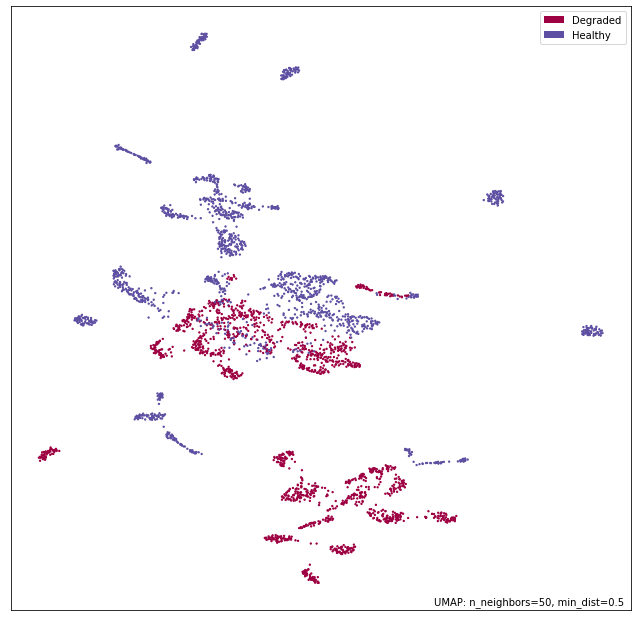

In [ ]:
#uses the 'habitat' column as the label
umap.plot.points(mapper, labels=pretrained_df.Habitat)#, theme = 'fire')

## Fully trained network

In [ ]:
# Uppload the csv of features and copy the path
trained_path = r'/content/drive/MyDrive/Reef soundscapes with AI/Results/full_dataset_features/trained_CNN_indo.csv'

data = pd.read_csv (trained_path) #load dataframe
temp_df = data.reset_index() #put index in order
temp_df = temp_df.iloc[: , 2:] #remove unnecessary index
temp_df = temp_df.T #transpose to match indices format
temp_df = temp_df.reset_index() #re-add the index
trained_df = temp_df.rename(columns={"index": "minute"})


trained_df

,minute,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,BoF2.0930D.1678278701.180828.NT0930.wav,0.477650,5.012879,1.915835,0.000000,0.000000,0.000000,1.062819,0.0,0.0,...,0.0,0.000000,2.679418,0.000814,2.236241,0.036649,0.0,0.408422,0.602255,0.006626
1,SaF4.0902D.671907872.180830.NT0924.wav,0.000000,7.778984,0.000000,0.051206,0.000000,3.912268,8.325169,0.0,0.0,...,0.0,3.696773,1.264271,0.075675,0.183685,4.998559,0.0,0.000000,6.332646,8.498202
2,SaF3.1355D.805322778.180829.NT1356.wav,0.000000,6.534332,0.000000,0.005836,1.756667,5.124594,9.576670,0.0,0.0,...,0.0,6.169143,0.528039,0.015261,1.281214,5.205583,0.0,0.000000,4.791251,10.420626
3,SaN11.0940D.1678278701.180906.NT0954.wav,0.000000,6.228039,0.014625,0.080811,0.000000,2.651456,7.318202,0.0,0.0,...,0.0,3.214074,0.648099,0.202112,0.153203,4.936759,0.0,0.000000,4.411826,7.012685
4,BoF2.0930D.1678278701.180828.NT0950.wav,0.500470,6.841762,1.056410,0.000000,0.000000,0.000000,1.647999,0.0,0.0,...,0.0,0.000000,3.390443,0.025399,2.531892,0.000000,0.0,0.208863,1.573495,0.001159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3331,BoF3.1205H.1678278701.180829.NT1231.wav,0.000196,5.258828,8.635107,0.000000,0.000000,0.000000,1.996149,0.0,0.0,...,0.0,0.205999,1.081517,0.000000,2.509933,2.613406,0.0,0.000000,0.000000,0.000000
3332,BoF5.0940D.1677983769.180831.NT1007.wav,0.532786,4.515354,2.445653,0.000000,0.000000,0.000000,1.360959,0.0,0.0,...,0.0,0.000000,2.162292,0.000000,2.122140,0.167722,0.0,0.277897,0.835900,0.004171
3333,BoF3.1205H.1678278701.180829.NT1205.wav,0.000000,5.511929,9.140562,0.000000,0.000000,0.000000,1.988076,0.0,0.0,...,0.0,0.242234,0.896196,0.000984,2.650631,2.792336,0.0,0.000000,0.000000,0.000000
3334,BoF5.0940H.671907872.180831.NT1035.wav,0.000000,5.681407,7.036606,0.000000,0.000000,0.022304,2.584418,0.0,0.0,...,0.0,0.315856,1.225709,0.011944,2.828339,3.323339,0.0,0.000000,0.073636,0.028525


In [ ]:
# Add a column that denotes class
def get_class(filename):
    #find part of the name that corresponds to the deployment
     #adapted the get_identifier function above to only get class (e.g healthy)
    t = filename.split(".")[1][4:5]
    return t

class_type = []
for i in trained_df['minute']:
  if get_class(i) == 'D':
    class_type.append('Degraded')
  if get_class(i) == 'H':
    class_type.append('Healthy')

trained_df.insert(1, 'Habitat', class_type)

# Check the class column was added 
trained_df.head()

,minute,Habitat,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,BoF2.0930D.1678278701.180828.NT0930.wav,Degraded,0.47765,5.012879,1.915835,0.000000,0.000000,0.000000,1.062819,0.0,...,0.0,0.000000,2.679418,0.000814,2.236241,0.036649,0.0,0.408422,0.602255,0.006626
1,SaF4.0902D.671907872.180830.NT0924.wav,Degraded,0.00000,7.778984,0.000000,0.051206,0.000000,3.912268,8.325169,0.0,...,0.0,3.696773,1.264271,0.075675,0.183685,4.998559,0.0,0.000000,6.332646,8.498202
2,SaF3.1355D.805322778.180829.NT1356.wav,Degraded,0.00000,6.534332,0.000000,0.005836,1.756667,5.124594,9.576670,0.0,...,0.0,6.169143,0.528039,0.015261,1.281214,5.205583,0.0,0.000000,4.791251,10.420626
3,SaN11.0940D.1678278701.180906.NT0954.wav,Degraded,0.00000,6.228039,0.014625,0.080811,0.000000,2.651456,7.318202,0.0,...,0.0,3.214074,0.648099,0.202112,0.153203,4.936759,0.0,0.000000,4.411826,7.012685
4,BoF2.0930D.1678278701.180828.NT0950.wav,Degraded,0.50047,6.841762,1.056410,0.000000,0.000000,0.000000,1.647999,0.0,...,0.0,0.000000,3.390443,0.025399,2.531892,0.000000,0.0,0.208863,1.573495,0.001159


In [ ]:
#####create standard plot in viewer 
mapper = umap.UMAP(n_neighbors=50, min_dist=0.5).fit(trained_df.iloc[:,2:130])

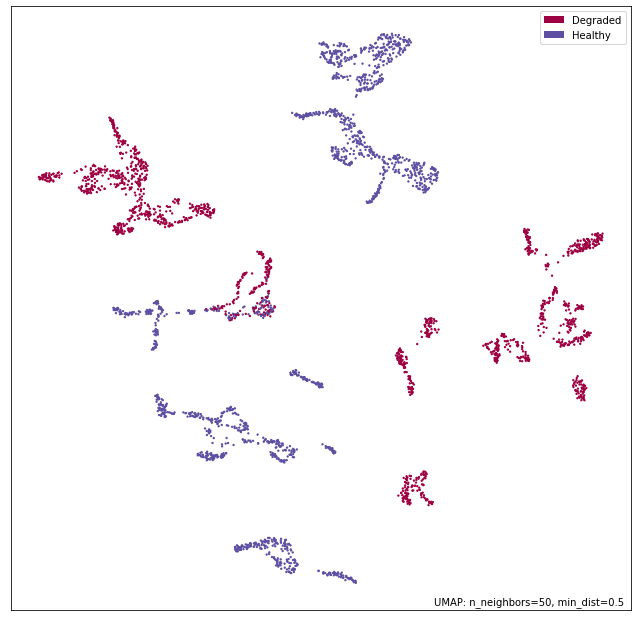

In [ ]:
#uses the 'habitat' column as the label
umap.plot.points(mapper, labels=trained_df.Habitat)#, theme = 'fire')

# **Indices split by site**

In [ ]:
# Uppload the csv of features and copy the path
indices_path = r'/content/drive/MyDrive/Reef soundscapes with AI/Results/full_dataset_features/compound_index_indo.csv'

data = pd.read_csv (indices_path) #load dataframe
indices_df = data.reset_index() #put index in order
indices_df = indices_df.iloc[: , 2:] #remove unnecessary index

indices_df

,minute,fish_ACI,fish_ACI_std,fish_ADI,fish_ADI_std,fish_H,fish_H_std,fish_Hf,fish_Hf_std,fish_M,...,full_H,full_H_std,full_Hf,full_Hf_std,full_M,full_M_std,full_BI,full_BI_std,NDSI,NDSI_std
0,BoF2.0930D.1678278701.180828.NT0930.wav,180.667980,22.555182,2.156149,0.081462,0.999806,0.000139,0.467640,0.038913,0.000159,...,0.999958,0.000026,0.742105,0.022057,0.000786,0.000096,3.756085,0.957902,0.628277,0.177200
1,SaF4.0902D.671907872.180830.NT0924.wav,202.084403,21.433853,2.195789,0.292442,0.999908,0.000045,0.483962,0.025508,0.000278,...,0.999942,0.000031,0.744351,0.011731,0.001902,0.000176,5.525697,0.881614,0.481185,0.106375
2,SaF3.1355D.805322778.180829.NT1356.wav,181.766749,25.356359,2.199550,0.048918,0.999864,0.000118,0.476466,0.026665,0.000189,...,0.999902,0.000058,0.741129,0.028133,0.001304,0.000093,4.907524,1.054116,0.441334,0.181443
3,SaN11.0940D.1678278701.180906.NT0954.wav,212.115207,15.154346,2.198496,0.289967,0.999900,0.000052,0.485119,0.020143,0.000309,...,0.999928,0.000028,0.739152,0.019008,0.001867,0.000165,4.531680,1.029127,0.350785,0.115750
4,BoF2.0930D.1678278701.180828.NT0950.wav,162.062029,15.067175,1.838506,0.212173,0.999364,0.000434,0.383880,0.047324,0.000382,...,0.999957,0.000024,0.738157,0.021520,0.000937,0.000076,3.721564,0.882146,0.570787,0.168368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3331,BoF3.1205H.1678278701.180829.NT1231.wav,179.962468,22.264434,2.144230,0.285608,0.999772,0.000190,0.471485,0.038290,0.000183,...,0.999956,0.000022,0.735731,0.025031,0.000882,0.000079,4.667324,1.402973,0.637327,0.128961
3332,BoF5.0940D.1677983769.180831.NT1007.wav,173.798179,18.817032,2.167538,0.078230,0.999808,0.000138,0.477006,0.043192,0.000152,...,0.999957,0.000024,0.739233,0.020290,0.000869,0.000075,4.770312,1.383683,0.703521,0.122336
3333,BoF3.1205H.1678278701.180829.NT1205.wav,170.721326,18.912549,2.195331,0.049818,0.999738,0.000199,0.481841,0.028076,0.000181,...,0.999955,0.000028,0.740048,0.019656,0.000890,0.000088,4.549716,1.364230,0.661858,0.099228
3334,BoF5.0940H.671907872.180831.NT1035.wav,182.770283,17.800611,2.232026,0.036044,0.999799,0.000152,0.486701,0.034486,0.000161,...,0.999958,0.000025,0.733094,0.017584,0.001027,0.000103,5.335363,1.142574,0.682951,0.120967


In [ ]:
# Add a column that denotes class
def get_class(filename):
    #find part of the name that corresponds to the deployment
     #adapted the get_identifier function above to only get class (e.g healthy)
    t = filename.split(".")[1][4:5]
    return t

site_name = []
for i in indices_df['minute']:
  class_type = get_class(i)
  prefix = i[0:2]
  site_code = class_type + prefix
  if site_code == 'HBa':
    site = 'Site A'
    site_name.append(site)
  if site_code == 'HBo':
    site = 'Site B'
    site_name.append(site)
  if site_code == 'DBo':
    site = 'Site C'
    site_name.append(site)
  if site_code == 'DSa':
    site = 'Site D'
    site_name.append(site)


indices_df.insert(1, 'Site', site_name)

# Check the class column was added 
indices_df.head()

,minute,Site,fish_ACI,fish_ACI_std,fish_ADI,fish_ADI_std,fish_H,fish_H_std,fish_Hf,fish_Hf_std,...,full_H,full_H_std,full_Hf,full_Hf_std,full_M,full_M_std,full_BI,full_BI_std,NDSI,NDSI_std
0,BoF2.0930D.1678278701.180828.NT0930.wav,Site C,180.667980,22.555182,2.156149,0.081462,0.999806,0.000139,0.467640,0.038913,...,0.999958,0.000026,0.742105,0.022057,0.000786,0.000096,3.756085,0.957902,0.628277,0.177200
1,SaF4.0902D.671907872.180830.NT0924.wav,Site D,202.084403,21.433853,2.195789,0.292442,0.999908,0.000045,0.483962,0.025508,...,0.999942,0.000031,0.744351,0.011731,0.001902,0.000176,5.525697,0.881614,0.481185,0.106375
2,SaF3.1355D.805322778.180829.NT1356.wav,Site D,181.766749,25.356359,2.199550,0.048918,0.999864,0.000118,0.476466,0.026665,...,0.999902,0.000058,0.741129,0.028133,0.001304,0.000093,4.907524,1.054116,0.441334,0.181443
3,SaN11.0940D.1678278701.180906.NT0954.wav,Site D,212.115207,15.154346,2.198496,0.289967,0.999900,0.000052,0.485119,0.020143,...,0.999928,0.000028,0.739152,0.019008,0.001867,0.000165,4.531680,1.029127,0.350785,0.115750
4,BoF2.0930D.1678278701.180828.NT0950.wav,Site C,162.062029,15.067175,1.838506,0.212173,0.999364,0.000434,0.383880,0.047324,...,0.999957,0.000024,0.738157,0.021520,0.000937,0.000076,3.721564,0.882146,0.570787,0.168368


In [ ]:
#####create standard plot in viewer 
mapper = umap.UMAP(n_neighbors=50, min_dist=0.5).fit(indices_df.iloc[:,2:40]) # may want to change params to .UMAP(n_neighbors=2, min_dist=0.5)

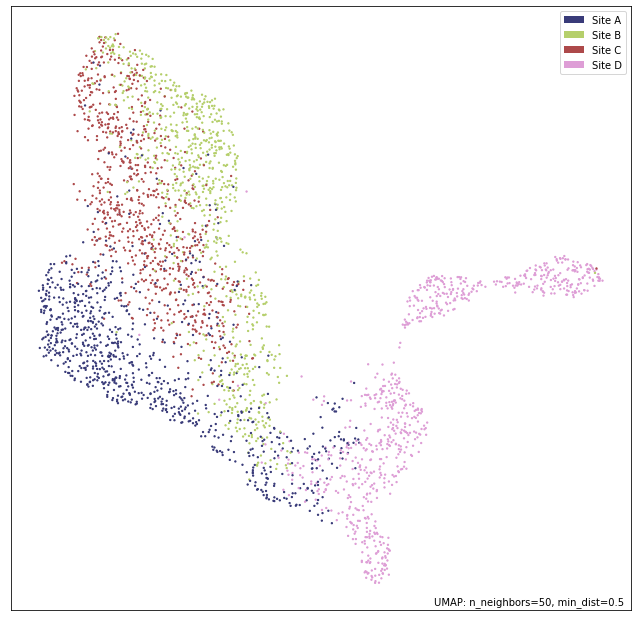

In [ ]:
#uses the 'habitat' column as the label
umap.plot.points(mapper, labels=indices_df.Site, theme = 'red')

# **Pretrained split by site**

In [ ]:
# Uppload the csv of features and copy the path
pretrained_path = r'/content/drive/MyDrive/Reef soundscapes with AI/Results/full_dataset_features/pretrained_CNN_indo.csv'

data = pd.read_csv (pretrained_path) #load dataframe
temp_df = data.reset_index() #put index in order
temp_df = temp_df.iloc[: , 2:] #remove unnecessary index
temp_df = temp_df.T #transpose to match indices format
temp_df = temp_df.reset_index() #re-add the index
pretrained_df = temp_df.rename(columns={"index": "minute"})


pretrained_df

,minute,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,BoF2.0930D.1678278701.180828.NT0930.wav,0.002933,0.177240,0.388430,0.129290,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.041895,0.000000,0.000000,0.000000,0.433386,0.320776,0.000000,0.000000,0.0
1,SaF4.0902D.671907872.180830.NT0924.wav,0.000917,0.073721,0.515714,0.111717,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.166053,0.000093,0.000208,0.048393,0.167975,0.032886,0.000000,0.000000,0.0
2,SaF3.1355D.805322778.180829.NT1356.wav,0.023495,0.104395,0.360114,0.143027,0.000000,0.0,0.0,0.000855,0.0,...,0.0,0.104303,0.036998,0.001894,0.006081,0.209761,0.121807,0.000000,0.000000,0.0
3,SaN11.0940D.1678278701.180906.NT0954.wav,0.000865,0.126758,0.437884,0.209243,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.117832,0.001151,0.011284,0.000152,0.328505,0.123348,0.000000,0.007058,0.0
4,BoF2.0930D.1678278701.180828.NT0950.wav,0.019745,0.176513,0.399040,0.040165,0.000027,0.0,0.0,0.006952,0.0,...,0.0,0.020741,0.020154,0.003591,0.003634,0.350962,0.285468,0.002281,0.000323,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3331,BoF3.1205H.1678278701.180829.NT1231.wav,0.010470,0.125127,0.444852,0.083505,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.023687,0.000918,0.000000,0.000753,0.493698,0.257412,0.000423,0.000000,0.0
3332,BoF5.0940D.1677983769.180831.NT1007.wav,0.006456,0.129605,0.418061,0.163294,0.000000,0.0,0.0,0.001106,0.0,...,0.0,0.085375,0.000477,0.000000,0.000180,0.326792,0.223547,0.000000,0.000000,0.0
3333,BoF3.1205H.1678278701.180829.NT1205.wav,0.001636,0.122509,0.458245,0.078943,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.022889,0.000000,0.000000,0.000000,0.514317,0.261960,0.000536,0.000000,0.0
3334,BoF5.0940H.671907872.180831.NT1035.wav,0.008864,0.049046,0.569985,0.045106,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.140025,0.000000,0.000000,0.095348,0.208568,0.032443,0.000000,0.000000,0.0


In [ ]:
# Add a column that denotes class
def get_class(filename):
    #find part of the name that corresponds to the deployment
     #adapted the get_identifier function above to only get class (e.g healthy)
    t = filename.split(".")[1][4:5]
    return t

site_name = []
for i in pretrained_df['minute']:
  class_type = get_class(i)
  prefix = i[0:2]
  site_code = class_type + prefix
  if site_code == 'HBa':
    site = 'Site A'
    site_name.append(site)
  if site_code == 'HBo':
    site = 'Site B'
    site_name.append(site)
  if site_code == 'DBo':
    site = 'Site C'
    site_name.append(site)
  if site_code == 'DSa':
    site = 'Site D'
    site_name.append(site)


pretrained_df.insert(1, 'Site', site_name)

# Check the class column was added 
pretrained_df.head()

,minute,Site,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,BoF2.0930D.1678278701.180828.NT0930.wav,Site C,0.002933,0.177240,0.388430,0.129290,0.000000,0.0,0.0,0.000000,...,0.0,0.041895,0.000000,0.000000,0.000000,0.433386,0.320776,0.000000,0.000000,0.0
1,SaF4.0902D.671907872.180830.NT0924.wav,Site D,0.000917,0.073721,0.515714,0.111717,0.000000,0.0,0.0,0.000000,...,0.0,0.166053,0.000093,0.000208,0.048393,0.167975,0.032886,0.000000,0.000000,0.0
2,SaF3.1355D.805322778.180829.NT1356.wav,Site D,0.023495,0.104395,0.360114,0.143027,0.000000,0.0,0.0,0.000855,...,0.0,0.104303,0.036998,0.001894,0.006081,0.209761,0.121807,0.000000,0.000000,0.0
3,SaN11.0940D.1678278701.180906.NT0954.wav,Site D,0.000865,0.126758,0.437884,0.209243,0.000000,0.0,0.0,0.000000,...,0.0,0.117832,0.001151,0.011284,0.000152,0.328505,0.123348,0.000000,0.007058,0.0
4,BoF2.0930D.1678278701.180828.NT0950.wav,Site C,0.019745,0.176513,0.399040,0.040165,0.000027,0.0,0.0,0.006952,...,0.0,0.020741,0.020154,0.003591,0.003634,0.350962,0.285468,0.002281,0.000323,0.0


In [ ]:
#####create standard plot in viewer 
mapper = umap.UMAP(n_neighbors=50, min_dist=0.5).fit(pretrained_df.iloc[:,2:130])

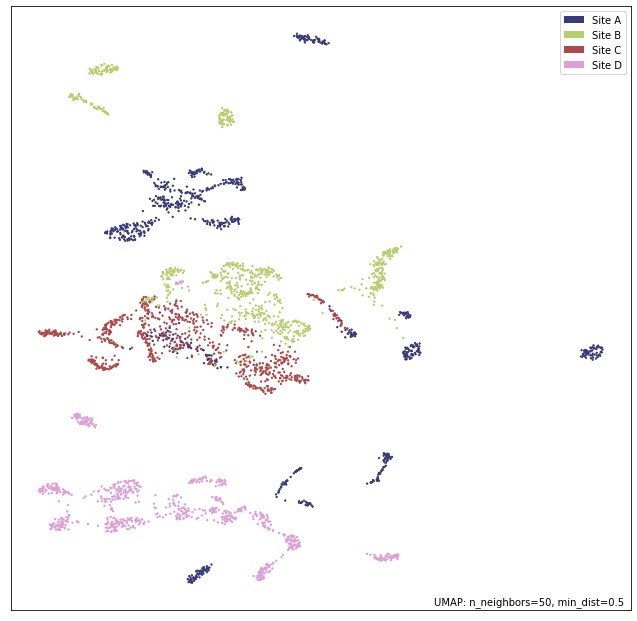

In [ ]:
#uses the 'habitat' column as the label
umap.plot.points(mapper, labels=pretrained_df.Site, theme = 'red')

# **Fully trained split by site**

In [ ]:
# Uppload the csv of features and copy the path
fullytrained_path = r'/content/drive/MyDrive/Reef soundscapes with AI/Results/full_dataset_features/trained_CNN_indo.csv'

data = pd.read_csv (fullytrained_path) #load dataframe
temp_df = data.reset_index() #put index in order
temp_df = temp_df.iloc[: , 2:] #remove unnecessary index
temp_df = temp_df.T #transpose to match indices format
temp_df = temp_df.reset_index() #re-add the index
fullytrained_df = temp_df.rename(columns={"index": "minute"})


fullytrained_df

,minute,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,BoF2.0930D.1678278701.180828.NT0930.wav,0.477650,5.012879,1.915835,0.000000,0.000000,0.000000,1.062819,0.0,0.0,...,0.0,0.000000,2.679418,0.000814,2.236241,0.036649,0.0,0.408422,0.602255,0.006626
1,SaF4.0902D.671907872.180830.NT0924.wav,0.000000,7.778984,0.000000,0.051206,0.000000,3.912268,8.325169,0.0,0.0,...,0.0,3.696773,1.264271,0.075675,0.183685,4.998559,0.0,0.000000,6.332646,8.498202
2,SaF3.1355D.805322778.180829.NT1356.wav,0.000000,6.534332,0.000000,0.005836,1.756667,5.124594,9.576670,0.0,0.0,...,0.0,6.169143,0.528039,0.015261,1.281214,5.205583,0.0,0.000000,4.791251,10.420626
3,SaN11.0940D.1678278701.180906.NT0954.wav,0.000000,6.228039,0.014625,0.080811,0.000000,2.651456,7.318202,0.0,0.0,...,0.0,3.214074,0.648099,0.202112,0.153203,4.936759,0.0,0.000000,4.411826,7.012685
4,BoF2.0930D.1678278701.180828.NT0950.wav,0.500470,6.841762,1.056410,0.000000,0.000000,0.000000,1.647999,0.0,0.0,...,0.0,0.000000,3.390443,0.025399,2.531892,0.000000,0.0,0.208863,1.573495,0.001159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3331,BoF3.1205H.1678278701.180829.NT1231.wav,0.000196,5.258828,8.635107,0.000000,0.000000,0.000000,1.996149,0.0,0.0,...,0.0,0.205999,1.081517,0.000000,2.509933,2.613406,0.0,0.000000,0.000000,0.000000
3332,BoF5.0940D.1677983769.180831.NT1007.wav,0.532786,4.515354,2.445653,0.000000,0.000000,0.000000,1.360959,0.0,0.0,...,0.0,0.000000,2.162292,0.000000,2.122140,0.167722,0.0,0.277897,0.835900,0.004171
3333,BoF3.1205H.1678278701.180829.NT1205.wav,0.000000,5.511929,9.140562,0.000000,0.000000,0.000000,1.988076,0.0,0.0,...,0.0,0.242234,0.896196,0.000984,2.650631,2.792336,0.0,0.000000,0.000000,0.000000
3334,BoF5.0940H.671907872.180831.NT1035.wav,0.000000,5.681407,7.036606,0.000000,0.000000,0.022304,2.584418,0.0,0.0,...,0.0,0.315856,1.225709,0.011944,2.828339,3.323339,0.0,0.000000,0.073636,0.028525


In [ ]:
# Add a column that denotes class
def get_class(filename):
    #find part of the name that corresponds to the deployment
     #adapted the get_identifier function above to only get class (e.g healthy)
    t = filename.split(".")[1][4:5]
    return t

site_name = []
for i in fullytrained_df['minute']:
  class_type = get_class(i)
  prefix = i[0:2]
  site_code = class_type + prefix
  if site_code == 'HBa':
    site = 'Site A'
    site_name.append(site)
  if site_code == 'HBo':
    site = 'Site B'
    site_name.append(site)
  if site_code == 'DBo':
    site = 'Site C'
    site_name.append(site)
  if site_code == 'DSa':
    site = 'Site D'
    site_name.append(site)


fullytrained_df.insert(1, 'Site', site_name)

# Check the class column was added 
fullytrained_df.head()

,minute,Site,0,1,2,3,4,5,6,7,...,118,119,120,121,122,123,124,125,126,127
0,BoF2.0930D.1678278701.180828.NT0930.wav,Site C,0.47765,5.012879,1.915835,0.000000,0.000000,0.000000,1.062819,0.0,...,0.0,0.000000,2.679418,0.000814,2.236241,0.036649,0.0,0.408422,0.602255,0.006626
1,SaF4.0902D.671907872.180830.NT0924.wav,Site D,0.00000,7.778984,0.000000,0.051206,0.000000,3.912268,8.325169,0.0,...,0.0,3.696773,1.264271,0.075675,0.183685,4.998559,0.0,0.000000,6.332646,8.498202
2,SaF3.1355D.805322778.180829.NT1356.wav,Site D,0.00000,6.534332,0.000000,0.005836,1.756667,5.124594,9.576670,0.0,...,0.0,6.169143,0.528039,0.015261,1.281214,5.205583,0.0,0.000000,4.791251,10.420626
3,SaN11.0940D.1678278701.180906.NT0954.wav,Site D,0.00000,6.228039,0.014625,0.080811,0.000000,2.651456,7.318202,0.0,...,0.0,3.214074,0.648099,0.202112,0.153203,4.936759,0.0,0.000000,4.411826,7.012685
4,BoF2.0930D.1678278701.180828.NT0950.wav,Site C,0.50047,6.841762,1.056410,0.000000,0.000000,0.000000,1.647999,0.0,...,0.0,0.000000,3.390443,0.025399,2.531892,0.000000,0.0,0.208863,1.573495,0.001159


In [ ]:
#####create standard plot in viewer 
mapper = umap.UMAP(n_neighbors=50, min_dist=0.5).fit(fullytrained_df.iloc[:,2:130])

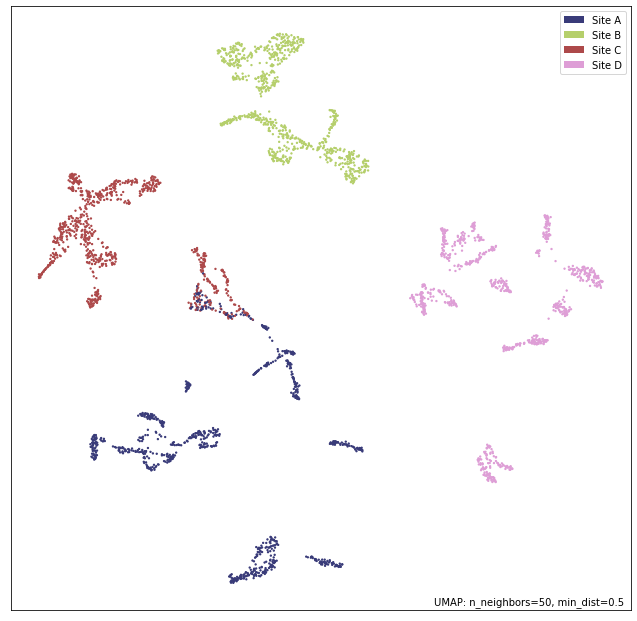

In [ ]:
#uses the 'habitat' column as the label
umap.plot.points(mapper, labels=fullytrained_df.Site, theme = 'red')